# Learnable loss

## Import librarys and model

In [1]:
%matplotlib widget

import random
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import higher

#torch.manual_seed(2)
#random.seed(2)
#np.random.seed(2)
#torch.backends.cudnn.benchmark = False
#torch.backends.cudnn.deterministic = True
#torch.use_deterministic_algorithms(True)

## Generate data

In [2]:
training_sample_count = 300
x_train = torch.rand((training_sample_count,2), dtype=torch.float32)*4.0-2.0
x_train[:,1] = np.sin(5.0*x_train[:,0])
x_train[training_sample_count//2:,1] += (0.5+torch.rand(training_sample_count//2)) - (np.random.randn(training_sample_count//2)<0)*2.0
y_train = torch.ones((x_train.shape[0]), dtype=torch.long)
y_train[training_sample_count//2:] = 0

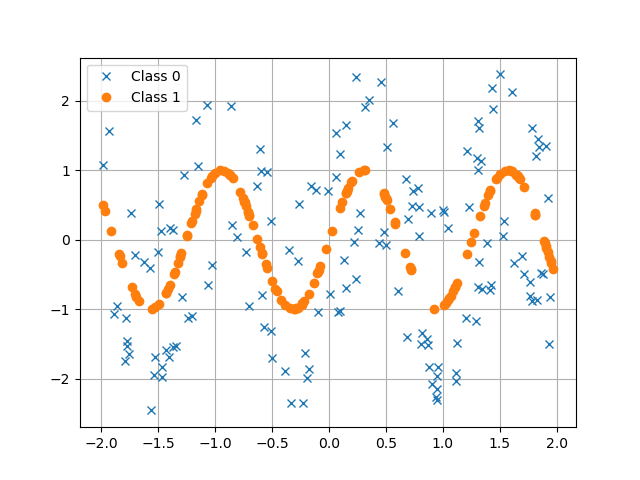

In [3]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(x_train[training_sample_count//2:,0],x_train[training_sample_count//2:,1], 'x', label='Class 0')
axes.plot(x_train[:training_sample_count//2,0],x_train[:training_sample_count//2,1], 'o', label='Class 1')
axes.legend()
axes.grid()

In [4]:
validation_sample_count = 100
x_val = torch.rand((validation_sample_count,2), dtype=torch.float32)*4.0-2.0
x_val[:,1] = np.sin(5.0*x_val[:,0])
x_val[validation_sample_count//2:,1] += (0.5+torch.rand(validation_sample_count//2)) - (np.random.randn(validation_sample_count//2)<0)*2.0
y_val = torch.ones((x_val.shape[0]), dtype=torch.long)
y_val[validation_sample_count//2:] = 0

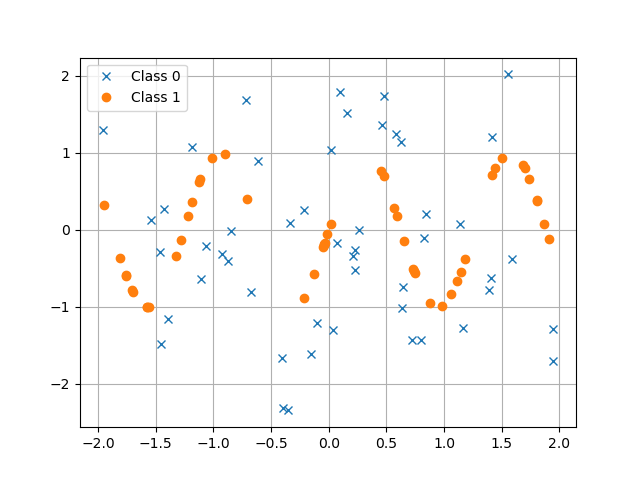

In [5]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(x_val[validation_sample_count//2:,0],x_val[validation_sample_count//2:,1], 'x', label='Class 0')
axes.plot(x_val[:validation_sample_count//2,0],x_val[:validation_sample_count//2,1], 'o', label='Class 1')
axes.legend()
axes.grid()

In [6]:
test_sample_count = 100
x_test = torch.rand((test_sample_count,2), dtype=torch.float32)*4.0-2.0
x_test[:,1] = np.sin(5.0*x_test[:,0])
x_test[test_sample_count//2:,1] += (0.5+torch.rand(test_sample_count//2)) - (np.random.randn(test_sample_count//2)<0)*2.0
y_test = torch.ones((x_test.shape[0]), dtype=torch.long)
y_test[test_sample_count//2:] = 0

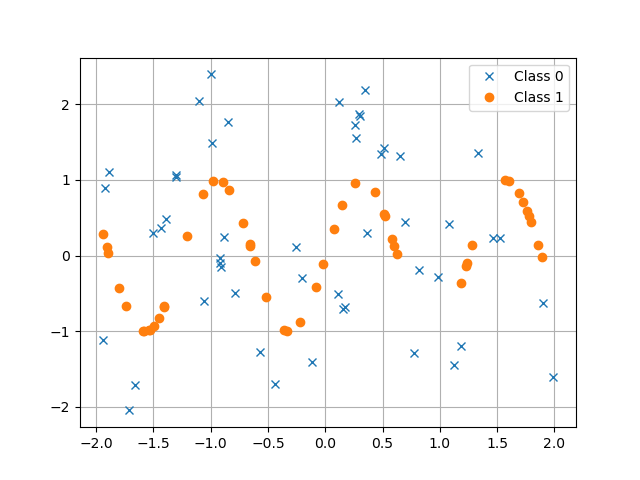

In [7]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(x_test[test_sample_count//2:,0],x_test[test_sample_count//2:,1], 'x', label='Class 0')
axes.plot(x_test[:test_sample_count//2,0],x_test[:test_sample_count//2,1], 'o', label='Class 1')
axes.legend()
axes.grid()

## Define model

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        count_hidden = 100
        self.layers = nn.Sequential(
            nn.Linear(2, count_hidden),
            nn.ReLU(),
            nn.Linear(count_hidden, count_hidden),
            nn.ReLU(),
            nn.Linear(count_hidden, 2)
        )

    def forward(self, x):
        return self.layers(x)

## Standard loss

### Train model

In [9]:
model = Net()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

for epoch in range(20001):
    if epoch%1000 == 0:
        print(f"Epoch {epoch}:")

    model.train()
    z_train = model(x_train)
    loss = loss_function(z_train, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%1000 == 0:
        print(f"\tTraining loss: {loss.item()}")

    model.eval()
    z_val = model(x_val)
    loss = loss_function(z_val, y_val)
    if epoch%1000 == 0:
        print(f"\tvalidation loss: {loss.item()}\n")

Epoch 0:
	Training loss: 0.6984399557113647
	validation loss: 0.6936216950416565

Epoch 1000:
	Training loss: 0.6072787046432495
	validation loss: 0.6069046258926392

Epoch 2000:
	Training loss: 0.5657448768615723
	validation loss: 0.5734238028526306

Epoch 3000:
	Training loss: 0.5299177765846252
	validation loss: 0.5487277507781982

Epoch 4000:
	Training loss: 0.49497783184051514
	validation loss: 0.5262521505355835

Epoch 5000:
	Training loss: 0.4624747633934021
	validation loss: 0.5049314498901367

Epoch 6000:
	Training loss: 0.4351959228515625
	validation loss: 0.48688679933547974

Epoch 7000:
	Training loss: 0.4130555987358093
	validation loss: 0.4722881615161896

Epoch 8000:
	Training loss: 0.3955967426300049
	validation loss: 0.4623720943927765

Epoch 9000:
	Training loss: 0.38087669014930725
	validation loss: 0.45255184173583984

Epoch 10000:
	Training loss: 0.36761024594306946
	validation loss: 0.44277793169021606

Epoch 11000:
	Training loss: 0.35441088676452637
	validation 

### Evaluate model

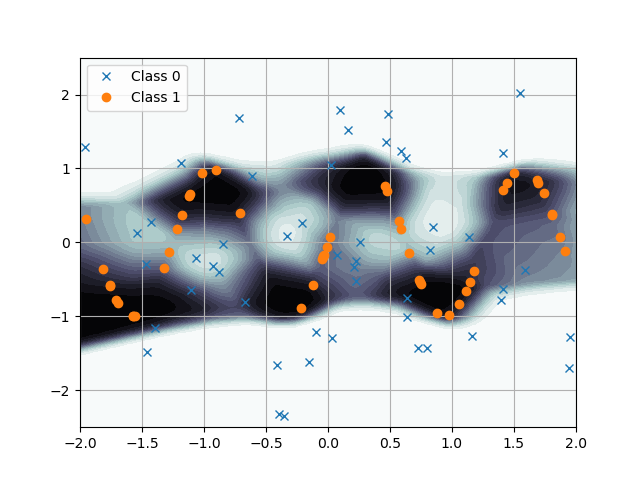

In [10]:
model.eval()
with torch.no_grad():
    resolution = 100
    grid_x, grid_y = torch.meshgrid(torch.linspace(-2.0, 2.0, resolution), torch.linspace(-2.5, 2.5, resolution))
    grid = torch.cat((torch.reshape(grid_x, (-1,1)), torch.reshape(grid_y, (-1,1))), 1)

    probs = nn.functional.softmax(model(grid), dim=1)
    output = torch.reshape(probs[:,0], (resolution,resolution))

    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.contourf(grid_x.detach().numpy(), grid_y.detach().numpy(), output.detach().numpy(), np.linspace(0, 1, 20), cmap=plt.cm.bone)
    axes.plot(x_val[validation_sample_count//2:,0],x_val[validation_sample_count//2:,1], 'x', label='Class 0')
    axes.plot(x_val[:validation_sample_count//2,0],x_val[:validation_sample_count//2,1], 'o', label='Class 1')
    axes.legend()
    axes.grid()

## Learnable loss

### Define parameterized loss function (e.g. label smoothing)

In [11]:
class LabelSmoothingLoss(nn.Module):
    def __init__(self, smoothing=0.0):
        super(LabelSmoothingLoss, self).__init__()
        self.smoothing = nn.Parameter(smoothing.clone().detach())

    def forward(self, prediction, target):
        #assert 0 <= self.smoothing < 1
        neglog_softmaxPrediction = -prediction.log_softmax(dim=1)
        reparameterized_smoothing = torch.sigmoid(self.smoothing)
        weights = torch.ones_like(prediction)*reparameterized_smoothing/(prediction.shape[1]-1)
        smoothedLabels = torch.scatter(weights, 1, target.unsqueeze(1), torch.ones((prediction.shape[0],1), device=self.smoothing.device)-reparameterized_smoothing)
        return torch.mean(torch.sum(smoothedLabels*neglog_softmaxPrediction, dim=1))

### Alternating training

In [12]:
ll_model = Net()
ll_loss_function = LabelSmoothingLoss(torch.rand(1)/2.0)
ll_model_optimizer = torch.optim.SGD(ll_model.parameters(), lr=1e-2)
ll_loss_optimizer = torch.optim.SGD(ll_loss_function.parameters(), lr=1e-2)

for epoch in range(20001):
    if epoch%1000 == 0:
        print(f"Epoch {epoch}:")

    ll_model.train()
    z_train = ll_model(x_train)
    loss = ll_loss_function(z_train, y_train)
    ll_model_optimizer.zero_grad()
    loss.backward()
    ll_model_optimizer.step()
    
    if epoch%1000 == 0:
        print(f"\tTraining loss: {loss.item()}")

    #ll_model.eval()
    z_val = ll_model(x_val)
    loss = ll_loss_function(z_val, y_val)

    ll_loss_optimizer.zero_grad()
    loss.backward()
    ll_loss_optimizer.step()

    if epoch%1000 == 0:
        print(f"\tvalidation loss: {loss.item()}")
        print(f"\tSmoothing value: {ll_loss_function.smoothing.item()}")
        print()

Epoch 0:
	Training loss: 0.695771336555481
	validation loss: 0.6959598660469055
	Smoothing value: 0.43186742067337036

Epoch 1000:
	Training loss: 0.6895092725753784
	validation loss: 0.6900084018707275
	Smoothing value: 0.4849521219730377

Epoch 2000:
	Training loss: 0.6866317987442017
	validation loss: 0.6873010396957397
	Smoothing value: 0.5994008183479309

Epoch 3000:
	Training loss: 0.6819628477096558
	validation loss: 0.6830454468727112
	Smoothing value: 0.7598117589950562

Epoch 4000:
	Training loss: 0.6742061376571655
	validation loss: 0.6763686537742615
	Smoothing value: 0.9697294235229492

Epoch 5000:
	Training loss: 0.6620645523071289
	validation loss: 0.6659393906593323
	Smoothing value: 1.2306959629058838

Epoch 6000:
	Training loss: 0.6446863412857056
	validation loss: 0.6513798236846924
	Smoothing value: 1.536180019378662

Epoch 7000:
	Training loss: 0.62250155210495
	validation loss: 0.6337013840675354
	Smoothing value: 1.8666986227035522

Epoch 8000:
	Training loss: 0.

### Evaluate model

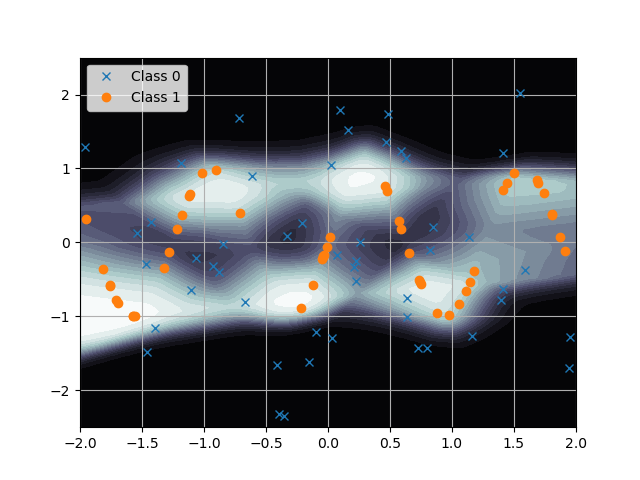

In [13]:
ll_model.eval()
with torch.no_grad():
    resolution = 100
    grid_x, grid_y = torch.meshgrid(torch.linspace(-2.0, 2.0, resolution), torch.linspace(-2.5, 2.5, resolution))
    grid = torch.cat((torch.reshape(grid_x, (-1,1)), torch.reshape(grid_y, (-1,1))), 1)
    
    probs = nn.functional.softmax(ll_model(grid), dim=1)
    output = torch.reshape(probs[:,0], (resolution,resolution))

    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.contourf(grid_x.detach().numpy(), grid_y.detach().numpy(), output.detach().numpy(), np.linspace(0, 1, 20), cmap=plt.cm.bone)
    axes.plot(x_val[validation_sample_count//2:,0],x_val[validation_sample_count//2:,1], 'x', label='Class 0')
    axes.plot(x_val[:validation_sample_count//2,0],x_val[:validation_sample_count//2,1], 'o', label='Class 1')
    axes.legend()
    axes.grid()

### Bilevel training

In [24]:
bl_model = Net()
bl_model.cuda()
bl_inner_loss_function = LabelSmoothingLoss(torch.tensor(-1.0))#-torch.rand(1)/2.0)
bl_inner_loss_function.cuda()
bl_outer_loss_function = nn.CrossEntropyLoss()
bl_inner_optimizer = torch.optim.Adam(bl_model.parameters())#torch.optim.SGD(bl_model.parameters(), lr=1e-1)
bl_outer_optimizer = torch.optim.SGD(bl_inner_loss_function.parameters(), lr=1e-1)
x_train = x_train.cuda()
y_train = y_train.cuda()
x_val = x_val.cuda()
y_val = y_val.cuda()
x_test = x_test.cuda()
y_test = y_test.cuda()

#############
bl_inner_optimizer.zero_grad()
bl_inner_loss_function(bl_model(x_train), y_train).backward()
bl_inner_optimizer.step()
#############

print(f"Smoothing value: {bl_inner_loss_function.smoothing.item()}\n")

for i in range(1000):
    with higher.innerloop_ctx(bl_model, bl_inner_optimizer) as (fmodel, diffopt):
        for j in range(5):
            z_train = fmodel(x_train)
            inner_loss = bl_inner_loss_function(z_train, y_train)
            print(f"Inner loss {j}: {inner_loss.item()}")
            diffopt.step(inner_loss)
        new_model_state = fmodel.state_dict()
        new_optimizer_state = diffopt.state[0]
            
        z_val = fmodel(x_val)
        outer_loss = bl_outer_loss_function(z_val, y_val)
        print(f"Outer loss: {outer_loss.item()}")
        bl_outer_optimizer.zero_grad()
        outer_loss.backward()
        bl_outer_optimizer.step()
        
    print(f"Smoothing value: {bl_inner_loss_function.smoothing.item()}")

    with torch.no_grad():
        bl_model.load_state_dict(new_model_state)
    with torch.no_grad():
        for group_idx, entries in new_optimizer_state.items():
            for entry_key, entry_value in entries.items():
                if torch.is_tensor(entry_value):
                    bl_inner_optimizer.state[bl_inner_optimizer.param_groups[0]["params"][group_idx]][entry_key].copy_(entry_value)
                else:
                    bl_inner_optimizer.state[bl_inner_optimizer.param_groups[0]["params"][group_idx]][entry_key] = entry_value
                    
    print()

print(f"Smoothing value: {bl_inner_loss_function.smoothing.item()}")

bl_model.eval()
with torch.no_grad():
    test_loss_acc = 0
    z_test = bl_model(x_test)
    print(f"Test loss: {bl_inner_loss_function(z_test, y_test)}")

Smoothing value: -1.0

Inner loss 0: 0.7006047964096069
Inner loss 1: 0.6945673227310181
Inner loss 2: 0.691257119178772
Inner loss 3: 0.6900156140327454
Inner loss 4: 0.689913272857666
Outer loss: 0.6794145107269287
Smoothing value: -1.000673532485962

Inner loss 0: 0.6899954080581665
Inner loss 1: 0.6896249651908875
Inner loss 2: 0.6887049078941345
Inner loss 3: 0.6874423623085022
Inner loss 4: 0.6861099600791931
Outer loss: 0.6674940586090088
Smoothing value: -1.0008471012115479

Inner loss 0: 0.6849212646484375
Inner loss 1: 0.6840453743934631
Inner loss 2: 0.683456301689148
Inner loss 3: 0.6830329298973083
Inner loss 4: 0.6826245188713074
Outer loss: 0.6580687761306763
Smoothing value: -1.0011091232299805

Inner loss 0: 0.6821132302284241
Inner loss 1: 0.6814807057380676
Inner loss 2: 0.6807255148887634
Inner loss 3: 0.6799201369285583
Inner loss 4: 0.6791770458221436
Outer loss: 0.6488056778907776
Smoothing value: -1.0015754699707031

Inner loss 0: 0.6785427927970886
Inner loss 1

### Evaluate model

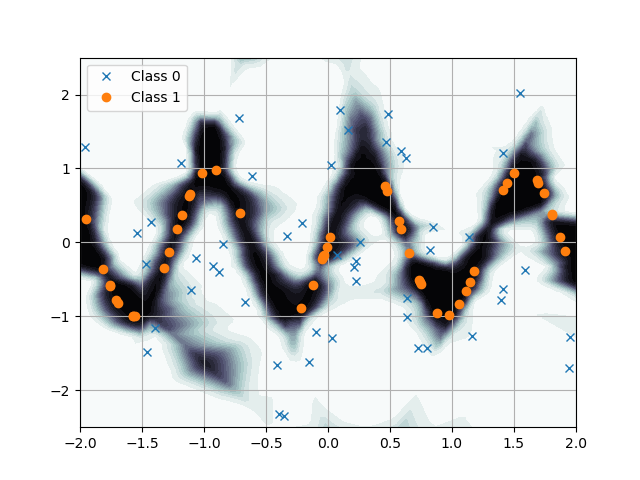

In [25]:
bl_model.eval()
bl_model.cuda()

with torch.no_grad():
    resolution = 100
    grid_x, grid_y = torch.meshgrid(torch.linspace(-2.0, 2.0, resolution), torch.linspace(-2.5, 2.5, resolution))
    grid = torch.cat((torch.reshape(grid_x, (-1,1)), torch.reshape(grid_y, (-1,1))), 1)
    
    probs = nn.functional.softmax(bl_model(grid.cuda()), dim=1).cpu()
    output = torch.reshape(probs[:,0], (resolution,resolution))

    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.contourf(grid_x.detach().numpy(), grid_y.detach().numpy(), output.detach().numpy(), np.linspace(0, 1, 20), cmap=plt.cm.bone)
    axes.plot(x_val[validation_sample_count//2:,0].cpu(), x_val[validation_sample_count//2:,1].cpu(), 'x', label='Class 0')
    axes.plot(x_val[:validation_sample_count//2,0].cpu(), x_val[:validation_sample_count//2,1].cpu(), 'o', label='Class 1')
    axes.legend()
    axes.grid()

## Hyperparameters

In [ ]:
bl_model = Net()
bl_model.cuda()
bl_inner_loss_function = LabelSmoothingLoss(torch.tensor(-1.0))#-torch.rand(1)/2.0)
bl_inner_loss_function.cuda()
bl_outer_loss_function = nn.CrossEntropyLoss()
bl_inner_optimizer = torch.optim.Adam(bl_model.parameters())#torch.optim.SGD(bl_model.parameters(), lr=1e-1)
bl_outer_optimizer = torch.optim.SGD(bl_inner_loss_function.parameters(), lr=1e-1)

###print(f"Smoothing value: {bl_inner_loss_function.smoothing.item()}\n")

smoothings = torch.linspace(-4,0,15).cuda()
losses = torch.zeros((15, 51, 3))
for test in range(15):
    bl_inner_loss_function = LabelSmoothingLoss(smoothings[test])#-torch.rand(1)/2.0)
    print(test)
    for i in range(5001):
        with higher.innerloop_ctx(bl_model, bl_inner_optimizer) as (fmodel, diffopt):
            inner_loss_acc = 0.0
            for j in range(5):
                x_train = x_train.cuda()
                y_train = y_train.cuda()
                z_train = fmodel(x_train)
                inner_loss = bl_inner_loss_function(z_train, y_train)
                ###print(f"Inner loss {j}: {inner_loss.item()}")
                inner_loss_acc += inner_loss.item()
                diffopt.step(inner_loss)
                new_parameters = fmodel.parameters()

            x_val = x_val.cuda()
            y_val = y_val.cuda()
            z_val = fmodel(x_val)
            loss = bl_outer_loss_function(z_val, y_val)

            if i%100 == 0:
                with torch.no_grad():
                    losses[test,i//100,0] = inner_loss_acc/5
                
            x_val = x_val.cuda()
            y_val = y_val.cuda()
            z_val = fmodel(x_val)
            outer_loss = bl_outer_loss_function(z_val, y_val)
            if i%100 == 0:
                with torch.no_grad():
                    losses[test,i//100,1] = outer_loss.item()
            ###print(f"Outer loss: {outer_loss.item()}")
            
        if i > 500:
            bl_outer_optimizer.zero_grad()
            outer_loss.backward()
            bl_outer_optimizer.step()
        #with torch.no_grad():
        #    inner_loss_function.smoothing.copy_(torch.clamp(inner_loss_function.smoothing, 0, 1))
        ###print(f"Smoothing value: {bl_inner_loss_function.smoothing.item()}")
        if i%100 == 0:
            with torch.no_grad():
                losses[test,i//100,2] = bl_inner_loss_function.smoothing.item()

        with torch.no_grad():
            for new_param, old_param in zip(new_parameters, bl_model.parameters()):
                old_param.copy_(new_param)
        ###print()

###print(f"Smoothing value: {bl_inner_loss_function.smoothing.item()}")

np.save("hyper_eval/smoothings", losses)

Text(0.5, 1.0, 'Smoothing value (Adam Adam)')

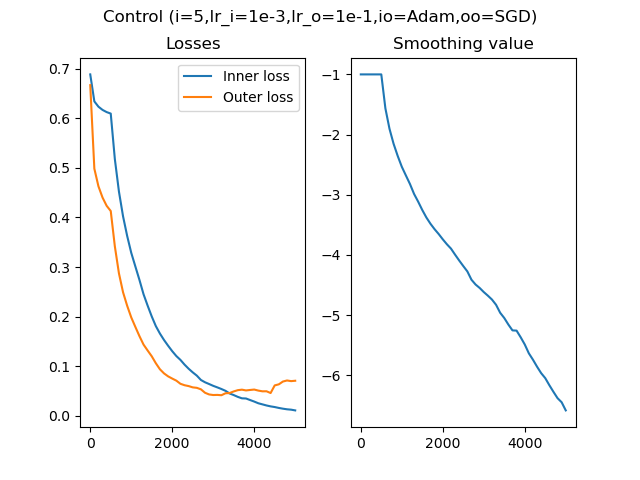

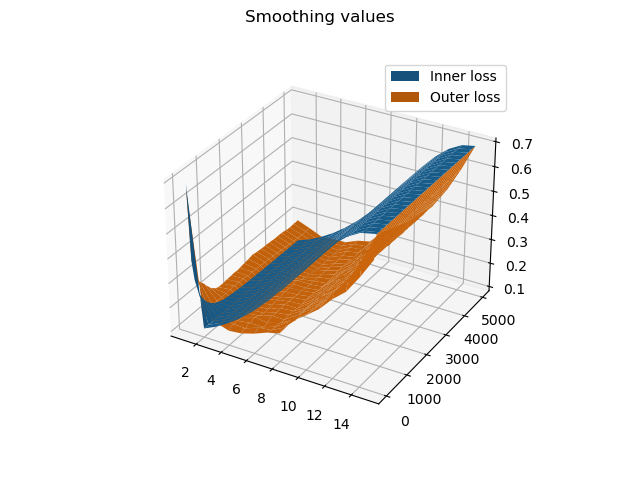

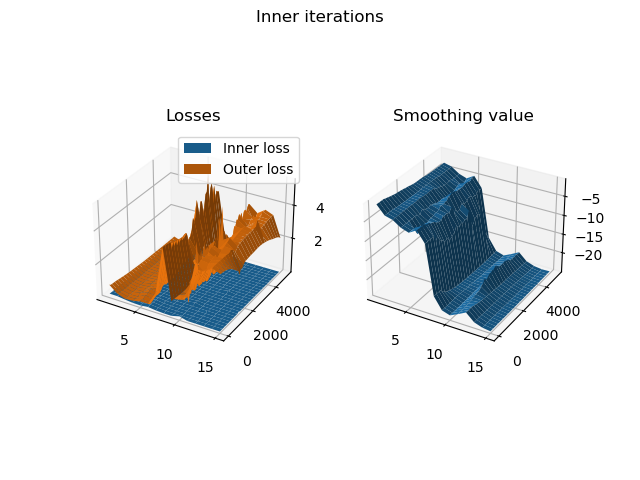

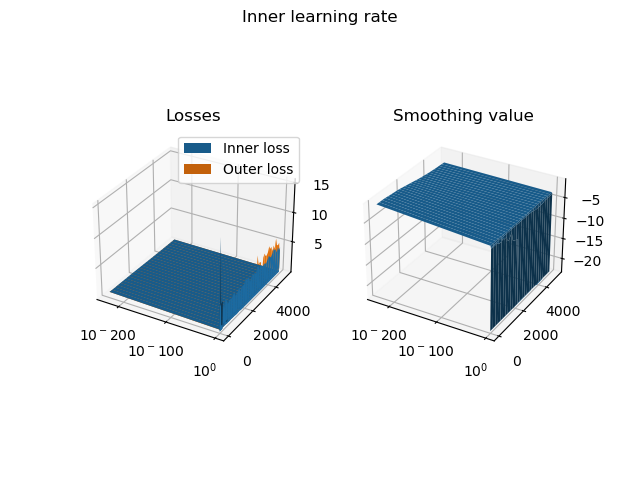

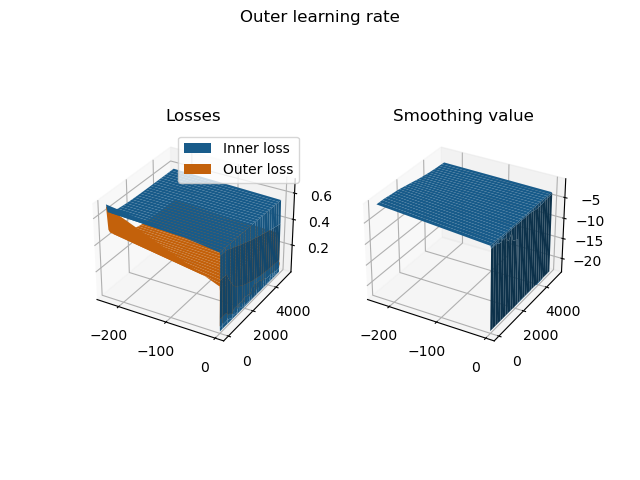

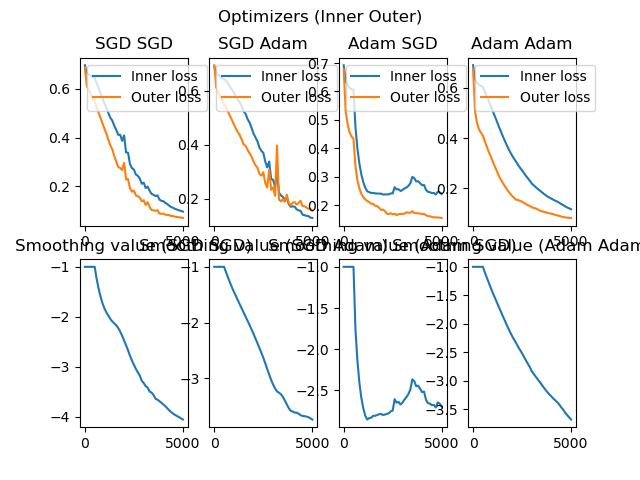

In [26]:
control_losses = np.load("hyper_eval/control.npy", allow_pickle=True)
fig = plt.figure()
fig.suptitle("Control (i=5,lr_i=1e-3,lr_o=1e-1,io=Adam,oo=SGD)")
axes = fig.add_subplot(121)
axes.plot(np.linspace(0,5000,51), control_losses[0,:,0], label="Inner loss")
axes.plot(np.linspace(0,5000,51), control_losses[0,:,1], label="Outer loss")
axes.legend()
axes.set_title("Losses")
axes = fig.add_subplot(122)
axes.plot(np.linspace(0,5000,51), control_losses[0,:,2])
axes.set_title("Smoothing value")

fig = plt.figure()
smoothings_losses = np.load("hyper_eval/smoothings.npy", allow_pickle=True)
grid_x, grid_y = np.meshgrid(np.linspace(1, 15, 15), np.linspace(0, 5000, 51))
fig.suptitle("Smoothing values")
axes = fig.add_subplot(111, projection="3d")
surf = axes.plot_surface(grid_x, grid_y, smoothings_losses[...,0].swapaxes(0,1), label="Inner loss")
surf._facecolors2d = surf._facecolor3d 
surf._edgecolors2d = surf._edgecolor3d
surf = axes.plot_surface(grid_x, grid_y, smoothings_losses[...,1].swapaxes(0,1), label="Outer loss")
surf._facecolors2d = surf._facecolor3d 
surf._edgecolors2d = surf._edgecolor3d
axes.legend()

fig = plt.figure()
inner_iters_losses = np.load("hyper_eval/inner_iters.npy", allow_pickle=True)
grid_x, grid_y = np.meshgrid(np.linspace(1, 15, 15), np.linspace(0, 5000, 51))
fig.suptitle("Inner iterations")
axes = fig.add_subplot(121, projection="3d")
surf = axes.plot_surface(grid_x, grid_y, inner_iters_losses[...,0].swapaxes(0,1), label="Inner loss")
surf._facecolors2d = surf._facecolor3d 
surf._edgecolors2d = surf._edgecolor3d
surf = axes.plot_surface(grid_x, grid_y, inner_iters_losses[...,1].swapaxes(0,1), label="Outer loss")
surf._facecolors2d = surf._facecolor3d 
surf._edgecolors2d = surf._edgecolor3d
axes.legend()
axes.set_title("Losses")
axes = fig.add_subplot(122, projection="3d")
axes.plot_surface(grid_x, grid_y, inner_iters_losses[...,2].swapaxes(0,1))
axes.set_title("Smoothing value")

fig = plt.figure()
inner_lrs_losses = np.load("hyper_eval/inner_lrs.npy", allow_pickle=True)
grid_x, grid_y = np.meshgrid(np.linspace(1e-100, 1, 7), np.linspace(0, 5000, 51))
fig.suptitle("Inner learning rate")
axes = fig.add_subplot(121, projection="3d")
surf = axes.plot_surface(np.log(grid_x), grid_y, inner_lrs_losses[...,0].swapaxes(0,1), label="Inner loss")
surf._facecolors2d = surf._facecolor3d 
surf._edgecolors2d = surf._edgecolor3d
surf = axes.plot_surface(np.log(grid_x), grid_y, inner_lrs_losses[...,1].swapaxes(0,1), label="Outer loss")
surf._facecolors2d = surf._facecolor3d 
surf._edgecolors2d = surf._edgecolor3d
axes.legend()
axes.xaxis.set_major_formatter(lambda val, pos=None: r"$10^{:.0f}$".format(val))
axes.set_title("Losses")
axes = fig.add_subplot(122, projection="3d")
axes.plot_surface(np.log(grid_x), grid_y, inner_lrs_losses[...,2].swapaxes(0,1))
axes.xaxis.set_major_formatter(lambda val, pos=None: r"$10^{:.0f}$".format(val))
axes.set_title("Smoothing value")

fig = plt.figure()
outer_lrs_losses = np.load("hyper_eval/outer_lrs.npy", allow_pickle=True)
grid_x, grid_y = np.meshgrid(np.linspace(1e-100, 1, 7), np.linspace(0, 5000, 51))
fig.suptitle("Outer learning rate")
axes = fig.add_subplot(121, projection="3d")
surf = axes.plot_surface(np.log(grid_x), grid_y, outer_lrs_losses[...,0].swapaxes(0,1), label="Inner loss")
surf._facecolors2d = surf._facecolor3d 
surf._edgecolors2d = surf._edgecolor3d
surf = axes.plot_surface(np.log(grid_x), grid_y, outer_lrs_losses[...,1].swapaxes(0,1), label="Outer loss")
surf._facecolors2d = surf._facecolor3d 
surf._edgecolors2d = surf._edgecolor3d
axes.legend()
axes.set_title("Losses")
axes = fig.add_subplot(122, projection="3d")
axes.plot_surface(np.log(grid_x), grid_y, inner_lrs_losses[...,2].swapaxes(0,1))
axes.set_title("Smoothing value")

sgd_sgd_losses = np.load("hyper_eval/sgd_sgd.npy", allow_pickle=True)
sgd_adam_losses = np.load("hyper_eval/sgd_adam.npy", allow_pickle=True)
adam_sgd_losses = np.load("hyper_eval/adam_sgd.npy", allow_pickle=True)
adam_adam_losses = np.load("hyper_eval/adam_adam.npy", allow_pickle=True)
fig = plt.figure()
fig.suptitle("Optimizers (Inner Outer)")
axes = fig.add_subplot(241)
axes.plot(np.linspace(0,5000,51), sgd_sgd_losses[0,:,0], label="Inner loss")
axes.plot(np.linspace(0,5000,51), sgd_sgd_losses[0,:,1], label="Outer loss")
axes.legend()
axes.set_title("SGD SGD")
axes = fig.add_subplot(242)
axes.plot(np.linspace(0,5000,51), sgd_adam_losses[0,:,0], label="Inner loss")
axes.plot(np.linspace(0,5000,51), sgd_adam_losses[0,:,1], label="Outer loss")
axes.legend()
axes.set_title("SGD Adam")
axes = fig.add_subplot(243)
axes.plot(np.linspace(0,5000,51), adam_sgd_losses[0,:,0], label="Inner loss")
axes.plot(np.linspace(0,5000,51), adam_sgd_losses[0,:,1], label="Outer loss")
axes.legend()
axes.set_title("Adam SGD")
axes = fig.add_subplot(244)
axes.plot(np.linspace(0,5000,51), adam_adam_losses[0,:,0], label="Inner loss")
axes.plot(np.linspace(0,5000,51), adam_adam_losses[0,:,1], label="Outer loss")
axes.legend()
axes.set_title("Adam Adam")
axes = fig.add_subplot(245)
axes.plot(np.linspace(0,5000,51), sgd_sgd_losses[0,:,2])
axes.set_title("Smoothing value (SGD SGD)")
axes = fig.add_subplot(246)
axes.plot(np.linspace(0,5000,51), sgd_adam_losses[0,:,2])
axes.set_title("Smoothing value (SGD Adam)")
axes = fig.add_subplot(247)
axes.plot(np.linspace(0,5000,51), adam_sgd_losses[0,:,2])
axes.set_title("Smoothing value (Adam SGD)")
axes = fig.add_subplot(248)
axes.plot(np.linspace(0,5000,51), adam_adam_losses[0,:,2])
axes.set_title("Smoothing value (Adam Adam)")

## Smoothing values

In [ ]:
sv_model = Net()
sv_cross_entropy_loss_function = nn.CrossEntropyLoss()
sv_optimizer = torch.optim.SGD(sv_model.parameters(), lr=1e-2)

epsilon = torch.linspace(-4.5, -2.0, 50)
training_losses = torch.zeros((50, 51, 2))
validation_losses = torch.zeros((50, 51, 2))

for i in range(50):
    sv_smoothing_loss_function = LabelSmoothingLoss(epsilon[i])
    print(f"epsilon = {epsilon[i]}: ")
    for epoch in range(5001):
        if epoch%1000 == 0:
            print(f"{epoch}", end=" ")

        sv_model.train()
        z_train = sv_model(x_train)
        smoothed_loss = sv_smoothing_loss_function(z_train, y_train)
        loss = sv_cross_entropy_loss_function(z_train, y_train)
        sv_optimizer.zero_grad()
        smoothed_loss.backward()
        sv_optimizer.step()
        if epoch%100 == 0:
            training_losses[i,epoch//100,0] = smoothed_loss.item()
            training_losses[i,epoch//100,1] = loss.item()

        sv_model.eval()
        z_val = sv_model(x_val)
        smoothed_loss = sv_smoothing_loss_function(z_val, y_val)
        loss = sv_cross_entropy_loss_function(z_val, y_val)
        if epoch%100 == 0:
            validation_losses[i,epoch//100,0] = smoothed_loss.item()
            validation_losses[i,epoch//100,1] = loss.item()
    print()

np.save("smoothing_eval/training_losses_2_min", training_losses)
np.save("smoothing_eval/validation_losses_2_min", validation_losses)


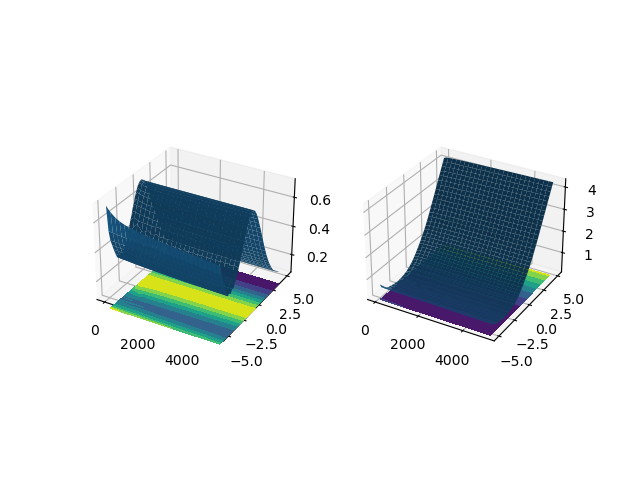

In [27]:
losses = torch.from_numpy(np.load("smoothing_eval/validation_losses_0.npy", allow_pickle=True))
grid_x, grid_y = torch.meshgrid(torch.linspace(0, 5000, 51), torch.linspace(-5.0, 5.0, 50))
fig = plt.figure()
axes = fig.add_subplot(121, projection='3d')
axes.plot_surface(grid_x.detach().numpy(), grid_y.detach().numpy(), losses.detach()[...,0].permute(1,0).numpy())
axes.contourf(grid_x.detach().numpy(), grid_y.detach().numpy(), losses.detach()[...,0].permute(1,0).numpy(), offset=0)
axes = fig.add_subplot(122, projection='3d')
axes.plot_surface(grid_x.detach().numpy(), grid_y.detach().numpy(), losses.detach()[...,1].permute(1,0).numpy())
axes.contourf(grid_x.detach().numpy(), grid_y.detach().numpy(), losses.detach()[...,1].permute(1,0).numpy(), offset=0)

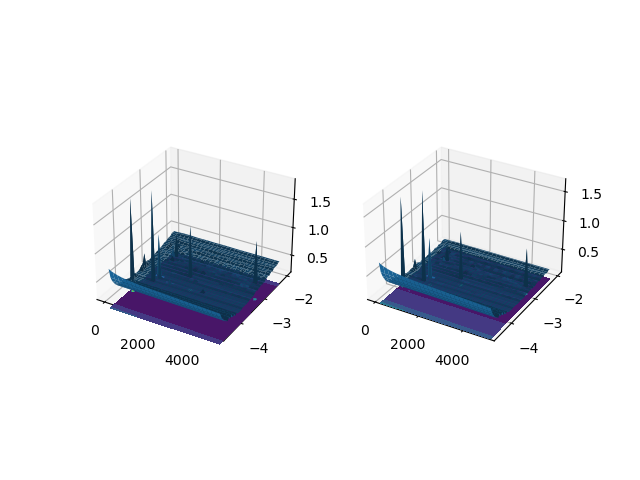

In [28]:
losses = torch.from_numpy(np.load("smoothing_eval/validation_losses_0_min.npy", allow_pickle=True))
grid_x, grid_y = torch.meshgrid(torch.linspace(0, 5000, 51), torch.linspace(-4.5, -2.0, 50))
fig = plt.figure()
axes = fig.add_subplot(121, projection='3d')
axes.plot_surface(grid_x.detach().numpy(), grid_y.detach().numpy(), losses.detach()[...,0].permute(1,0).numpy())
axes.contourf(grid_x.detach().numpy(), grid_y.detach().numpy(), losses.detach()[...,0].permute(1,0).numpy(), offset=0)
axes = fig.add_subplot(122, projection='3d')
axes.plot_surface(grid_x.detach().numpy(), grid_y.detach().numpy(), losses.detach()[...,1].permute(1,0).numpy())
axes.contourf(grid_x.detach().numpy(), grid_y.detach().numpy(), losses.detach()[...,1].permute(1,0).numpy(), offset=0)

Derivative of the Loss $L$ w.r.t the smoothing parameter $\epsilon\in[0,1]$ where $l$ is the negative-log-loss, $N\in\{x\mid x\in\mathbb{N},2\leq x\}$ is the number of classes and $j\in\{x\mid x\in\mathbb{N},0\leq x<N\}$ is the index of the correct class:
$$
\frac{\delta L}{\delta\epsilon} 
= 
\begin{pmatrix}
    \frac{1}{N-1}&
    \dots&
    \frac{1}{N-1}&
    -1&
    \frac{1}{N-1}&
    \dots&
    \frac{1}{N-1}
\end{pmatrix}
\cdot
\begin{pmatrix}
    l_0\\ 
    \vdots\\ 
    l_{j-1}\\ 
    l_j\\ 
    l_{j+1}\\ 
    \vdots\\ 
    l_N
\end{pmatrix}
=
\sum_{i\neq j}l_i-l_j 
=
\overline{l_{i\neq j}}-l_j
$$

The optimal smoothing parameter can be found at $\frac{\delta L}{\delta \epsilon}=0$:
$$ \frac{\delta L}{\delta \epsilon}=0\Rightarrow\overline{l_{i\neq j}}=l_j $$

Under the premise that j follow a uniform distribution the following holds for an $\epsilon$ such that $\frac{\delta L}{\delta\epsilon}=0$:
$$ 
l_0 = \overline{l_{i\neq 0}} \wedge l_1 = \overline{l_{i\neq 1}} \wedge \dots \wedge l_N = \overline{l_{i\neq N}}
\Rightarrow
l_0 = l_1 = \dots = l_N 
$$